In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn
warnings.filterwarnings('ignore')
import ray

In [2]:
df = pd.read_csv("Mini Loan Defaulter Data File.csv", header="infer")
df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,7/20/2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,8/10/2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,8/19/2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,6/6/2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,6/22/2016


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

209593 number of rows are there.

Seemingly there are no null values.

21 float type features, 12 integer type features and there are 3 categorical features.

pdate is a date type variable, since we don't have any information on how to manipulate or perceive teh data type data, we will drop it.

Also msisdn column values are phone numbers, being a defaulter also doesn't depends on phone number, we can drop it also.

In [4]:
df.drop(["msisdn","pdate"], 1, inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 34 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

In [6]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


There are many column with negative values, aon[age on cellular network in days], daily_decr30[Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)], daily_decr90[Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)], rental30[Average main account balance over last 30 days], rental90[Average main account balance over last 90 days], last_rech_date_ma[Number of days till last recharge of main account], last_rech_date_da[Number of days till last recharge of data account].

almost every column has its max value way larger than the 75th percentile, means there are outliers in almost every column.

In [7]:
#How many rows are there with negative aon.

df['aon'][df['aon'] < 0].count()

1539

In [8]:
#How many columns are there with negative values.

col_neg = []
for i in df.columns:
    if df[i].dtypes != 'object' and df[i].min() < 0:
        col_neg.append(i)

col_neg

['aon',
 'daily_decr30',
 'daily_decr90',
 'rental30',
 'rental90',
 'last_rech_date_ma',
 'last_rech_date_da',
 'medianmarechprebal30',
 'medianmarechprebal90']

In [9]:
#How many rows are there with negative values in each column.
sum = 0
for i in col_neg:
    n_neg = df[i][df[i] < 0].count()
    print("Number of rows with negative values in",i,"is:",n_neg)
    sum = sum + n_neg
print("Total number of rows with negative values all columns combined:",sum)

Number of rows with negative values in aon is: 1539
Number of rows with negative values in daily_decr30 is: 1839
Number of rows with negative values in daily_decr90 is: 1839
Number of rows with negative values in rental30 is: 5628
Number of rows with negative values in rental90 is: 5929
Number of rows with negative values in last_rech_date_ma is: 1315
Number of rows with negative values in last_rech_date_da is: 14
Number of rows with negative values in medianmarechprebal30 is: 1646
Number of rows with negative values in medianmarechprebal90 is: 1730
Total number of rows with negative values all columns combined: 21479


Logically we can't have age, amount spend or Number of days till last recharge in negative numbers. We can drop them row wise.

In [10]:
#Drop rows with negative aon, daily_decr30, daily_decr90, last_rech_date_ma and last_rech_date_da
pre_s = df.shape[0]
print(pre_s)
df = df[df['aon'] >= 0]
df = df[df['daily_decr30'] >= 0]
df = df[df['daily_decr90'] >= 0]
df = df[df['last_rech_date_ma'] >= 0]
df = df[df['last_rech_date_da'] >= 0]
post_s = df.shape[0]
print(post_s)
print("Number of rows removed",pre_s-post_s,"\nPercentage of rows removed",((pre_s-post_s)/pre_s)*100)

209593
204912
Number of rows removed 4681 
Percentage of rows removed 2.233376114660318


In [11]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,...,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000,204912.000000
mean,0.882369,8151.300467,5502.021547,6219.148622,2732.733675,3540.646252,3798.630012,3735.767478,2084.638679,4.046181,...,2.796654,18.209973,273.379274,0.054109,18.584758,24.033351,6.719255,0.045976,3.460467,4.404202
std,0.322171,75842.735181,9290.066345,11004.668147,4335.236673,5811.100633,54212.609219,53540.968615,2371.707382,4.276612,...,2.570460,17.488328,4236.103876,0.218153,224.862064,26.641745,2.124858,0.200401,8.861349,10.373781
min,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,251.000000,47.533333,47.809500,297.280000,320.130000,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,532.000000,1602.477333,1639.580000,1109.470000,1378.140000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.800000
75%,1.000000,986.000000,7435.000000,8035.617500,3419.057500,4281.430000,7.000000,0.000000,2309.000000,6.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.833333,4.600000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


Since amount remaining can be in negative, we haven't removed negative values rows from rental30 and rental90.

# Univariate Analysis

In [12]:
arr = []
for i in df.columns:
    if df[i].dtype != 'object':
        arr.append(i)
len(arr)

33

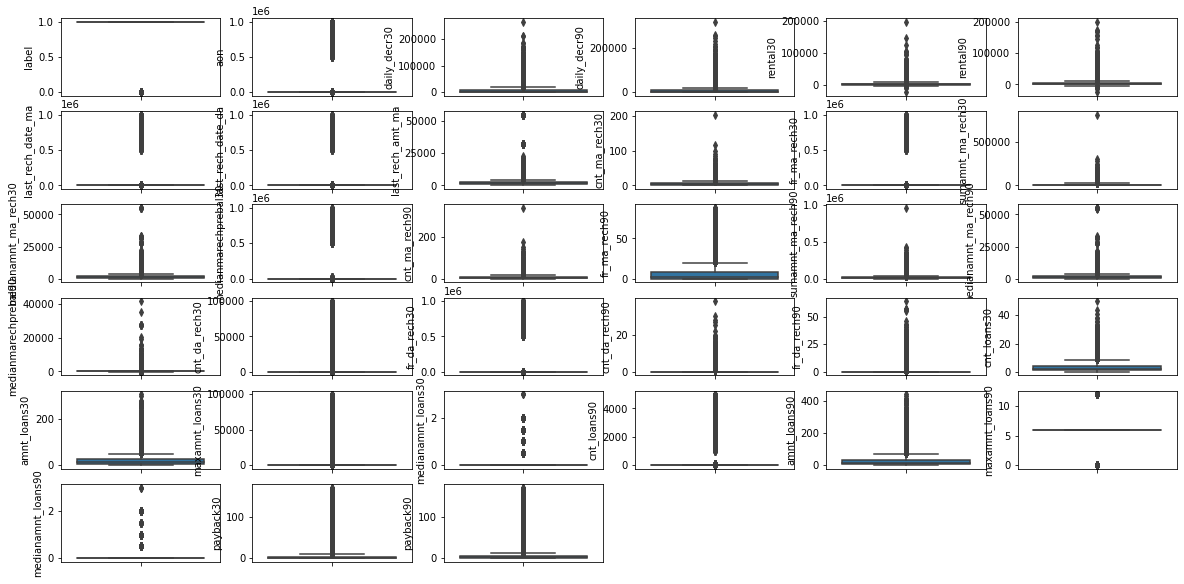

In [13]:
plt.figure(figsize=(20,10))
for i,j in enumerate(arr):
    plt.subplot(6,6,i+1)
    sns.boxplot(df[j], orient="v")

As we'd expected earlier, there are huge numbers of outliers in every column.

There are extreme outliers in maxamnt_loans90

In [14]:
df['maxamnt_loans90'].value_counts()

6     176268
12     26604
0       2040
Name: maxamnt_loans90, dtype: int64

In [15]:
df['maxamnt_loans30'].value_counts()

6.00000        174545
12.00000        26108
0.00000          3241
83030.48869         1
88244.04093         1
                ...  
32677.26348         1
80242.80113         1
25470.78343         1
77315.17319         1
66451.93809         1
Name: maxamnt_loans30, Length: 1021, dtype: int64

In the description file it is written there are only 2 values 5 and 10 for which payback amount will be 6 and 12 respectively, so all other values should be removed.

In [16]:
#Removing values other than 6 and 12

df = df[(df['maxamnt_loans30'] == 6.00000) | (df['maxamnt_loans30'] == 12.00000)]

In [17]:
df['maxamnt_loans30'].value_counts()

6.0     174545
12.0     26108
Name: maxamnt_loans30, dtype: int64

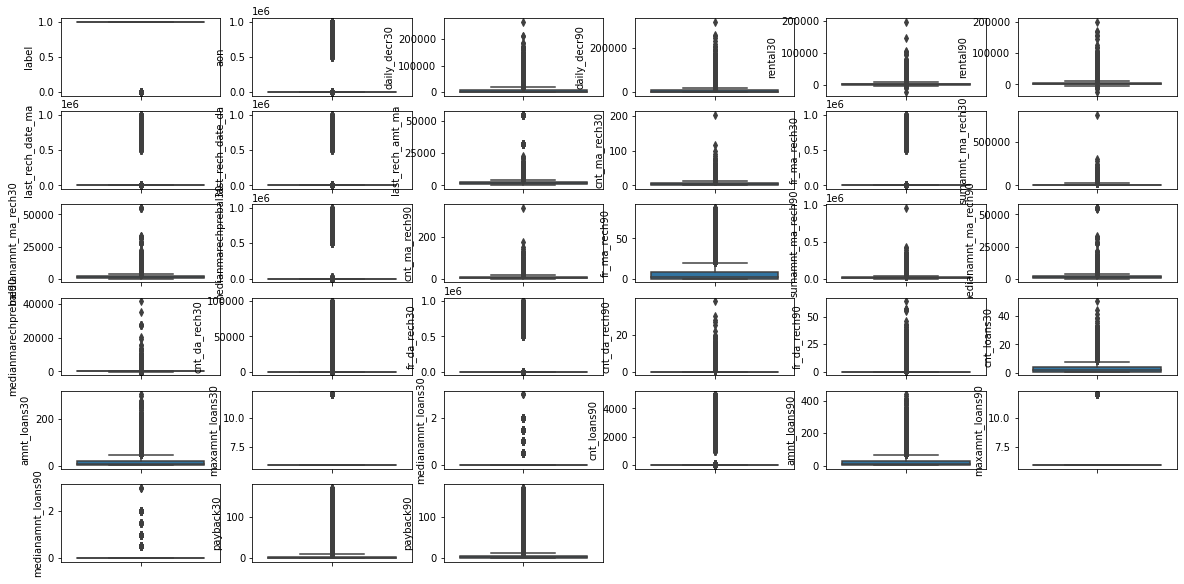

In [18]:
plt.figure(figsize=(20,10))
for i,j in enumerate(arr):
    plt.subplot(6,6,i+1)
    sns.boxplot(df[j], orient="v")

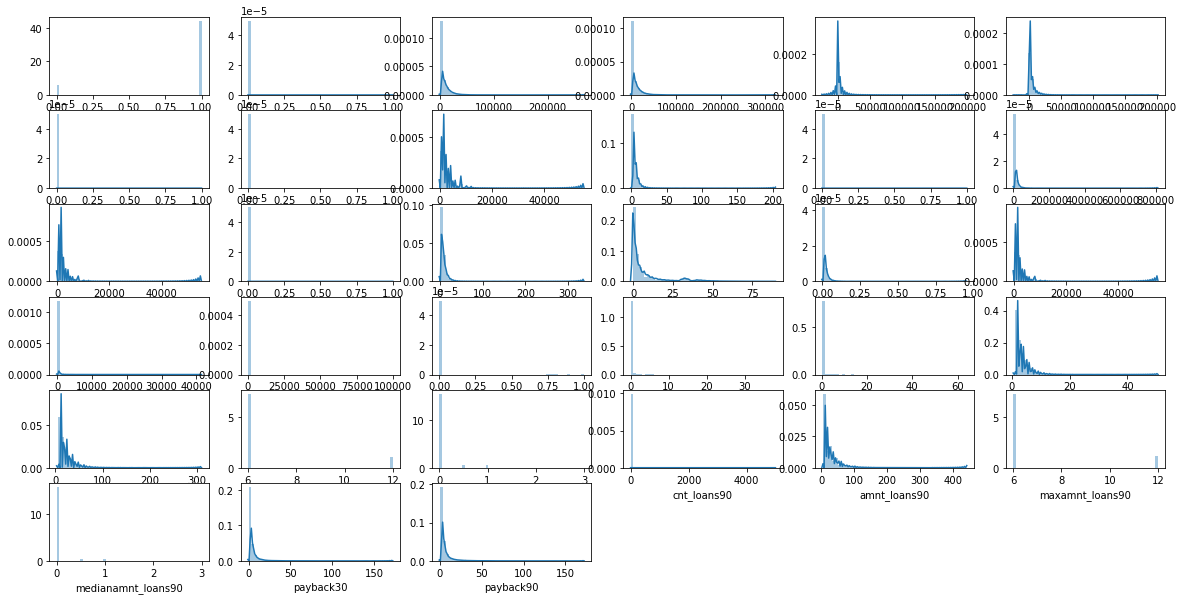

In [19]:
plt.figure(figsize=(20,10))
for i,j in enumerate(arr):
    plt.subplot(6,6,i+1)
    sns.distplot(df[j])

There is not so much skewness in the data, it seems close to normal distribution.

In [20]:
df.skew()

label                   -2.345260
aon                     10.375897
daily_decr30             3.933366
daily_decr90             4.249057
rental30                 4.435785
rental90                 4.348796
last_rech_date_ma       14.720979
last_rech_date_da       14.694944
last_rech_amt_ma         3.797413
cnt_ma_rech30            3.268956
fr_ma_rech30            14.721436
sumamnt_ma_rech30        6.410770
medianamnt_ma_rech30     3.477650
medianmarechprebal30    14.789129
cnt_ma_rech90            3.412985
fr_ma_rech90             2.283733
sumamnt_ma_rech90        4.910740
medianamnt_ma_rech90     3.741078
medianmarechprebal90    45.536772
cnt_da_rech30           17.738172
fr_da_rech30            14.781777
cnt_da_rech90           26.878332
fr_da_rech90            28.450719
cnt_loans30              2.712160
amnt_loans30             2.974781
maxamnt_loans30          2.198897
medianamnt_loans30       4.525027
cnt_loans90             16.590560
amnt_loans90             3.120176
maxamnt_loans9

In [21]:
d_df = df.copy()

In [22]:
df['medianmarechprebal90'].min()

-200.0

In [23]:
d_df = d_df[d_df['medianmarechprebal90'] != -1]

In [24]:
df = d_df

In [25]:
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,...,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000
mean,0.880445,8139.126689,5458.783346,6158.794957,2704.787291,3489.125971,3787.740732,3770.128262,2072.057732,4.070201,...,2.841831,18.504426,6.780695,0.054889,18.630982,24.353777,6.790533,0.046259,3.499603,4.410203
std,0.324442,75782.238187,9284.488238,10992.625120,4289.788072,5732.633211,54120.260436,53781.149477,2361.242964,4.290086,...,2.566466,17.477953,2.018590,0.219617,224.752294,26.734081,2.029353,0.201051,8.870415,10.322060
min,0.000000,1.000000,0.000000,0.000000,-23737.140000,-24720.580000,0.000000,0.000000,0.000000,0.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
25%,1.000000,252.000000,46.120000,46.365833,294.050000,313.867500,1.000000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,532.000000,1527.205667,1552.210000,1099.695000,1352.240000,3.000000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,1.000000,1.857143
75%,1.000000,985.000000,7362.058333,7916.000000,3382.150000,4224.505000,7.000000,0.000000,2309.000000,6.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,4.000000,4.625000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.377700,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


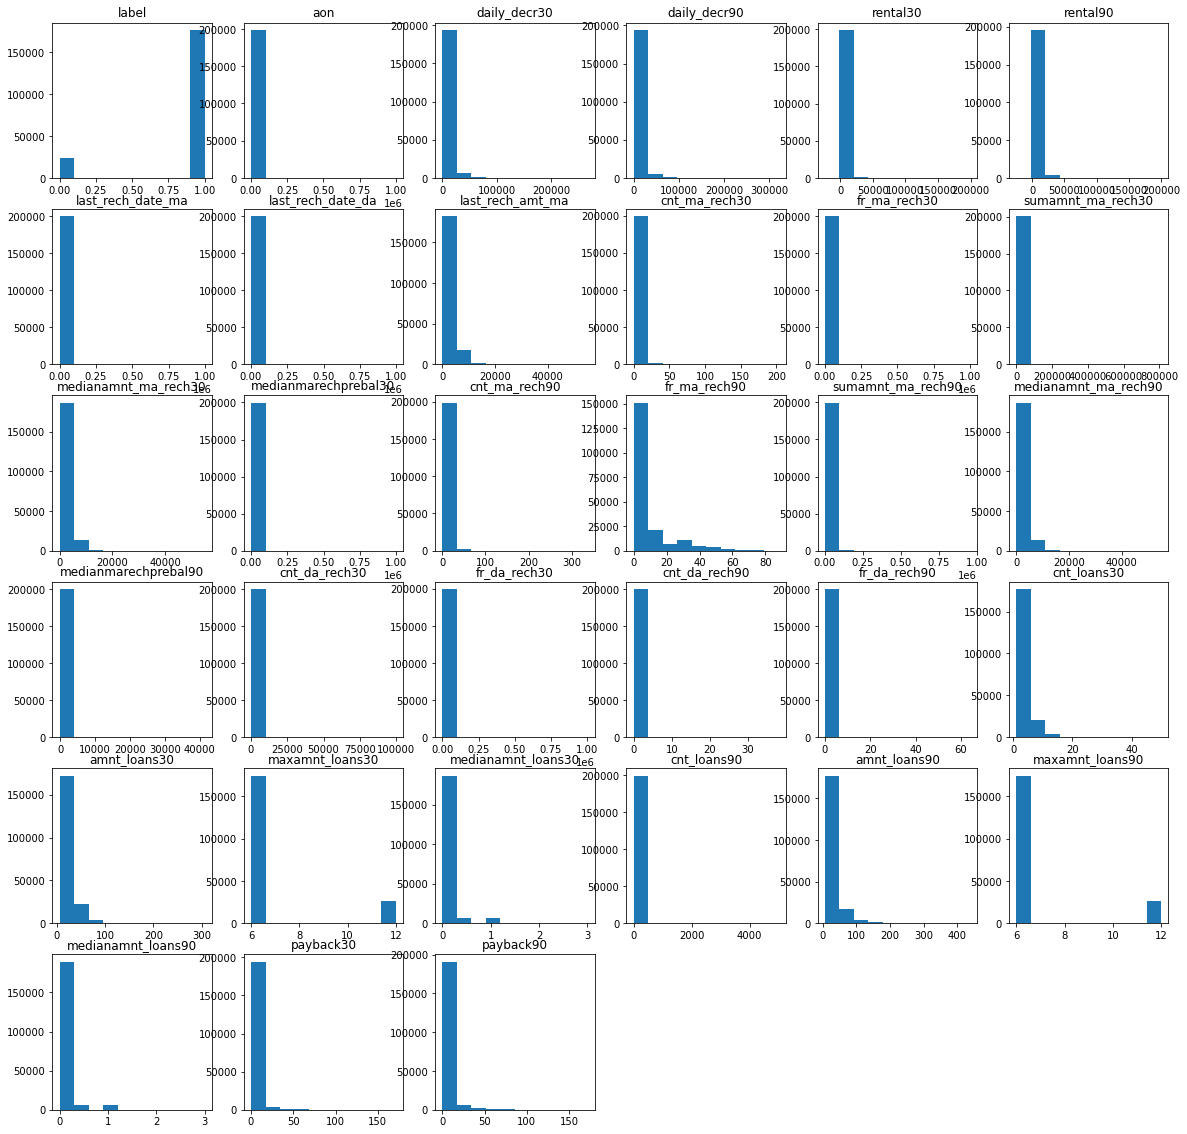

In [26]:
#Histogram

plt.figure(figsize=(20,20))
for i,j in enumerate(arr):
    plt.subplot(6,6,i+1)
    plt.hist(df[j])
    plt.title(j)

Label has only 2 unique values with frequency of one value being far less than the other value.

Even though recharge amount varies over large range, but median range is very small 0-5 with ~1 value as an outlier(value greater than 10)

# Bivariate Analysis

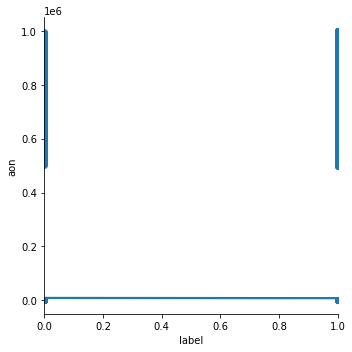

In [27]:
sns.lmplot(y='aon', x='label', data=df)

There is no relation between aon and label. We can drop it.

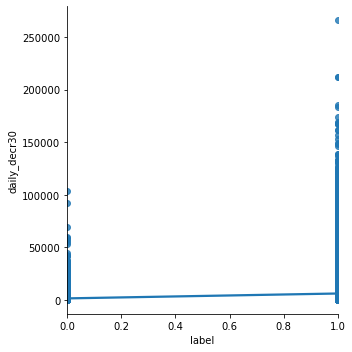

In [28]:
sns.lmplot(y='daily_decr30', x='label', data=df)

There is a very slight +ve slope between daily_decr30 and label. But the line appears near x axis means daily_decr30 is very much concentrated near 0.

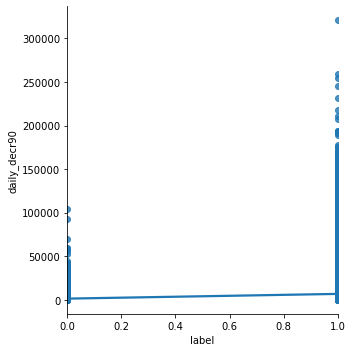

In [29]:
sns.lmplot(y='daily_decr90', x='label', data=df)

There is a very slight +ve slope between daily_decr90 and label. But the line appears near x axis means daily_decr90 is very much concentrated near 0. As one can expect from the plot between daily_recr30 and label.

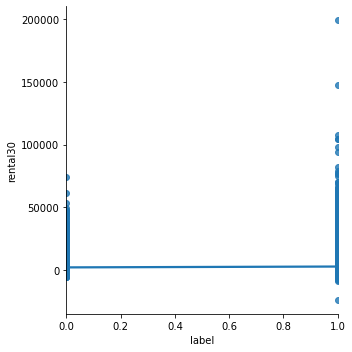

In [30]:
sns.lmplot(y='rental30', x='label', data=df)

The slope between rental30 and label seems 0. We shall drop the column.

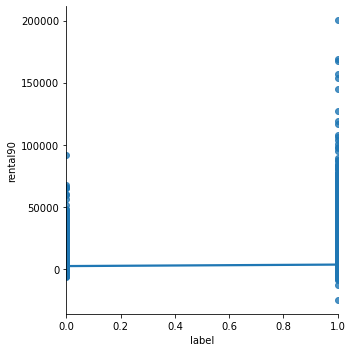

In [31]:
sns.lmplot(y='rental90', x='label', data=df)

The slope between rental90 and label seems 0. We shall drop the column. As expected from the plot of rental30.

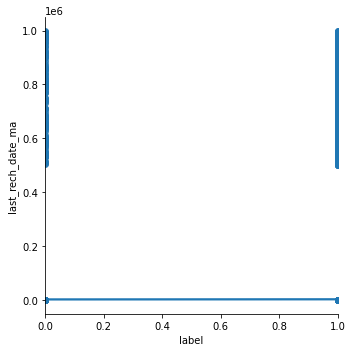

In [32]:
sns.lmplot(y='last_rech_date_ma', x='label', data=df)

The slope between last_rech_date_ma and label seems 0. We shall drop the column.

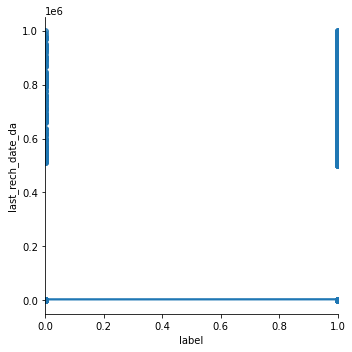

In [33]:
sns.lmplot(y='last_rech_date_da', x='label', data=df)

The slope between last_rech_date_da and label seems 0. We shall drop the column.

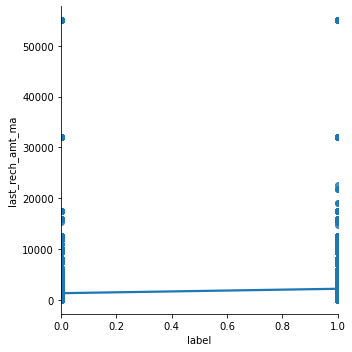

In [34]:
sns.lmplot(y='last_rech_amt_ma', x='label', data=df)

There is a very slight +ve slope between last_rech_date_da and label. But the line appears near x axis means last_rech_date_da is very much concentrated near 0.

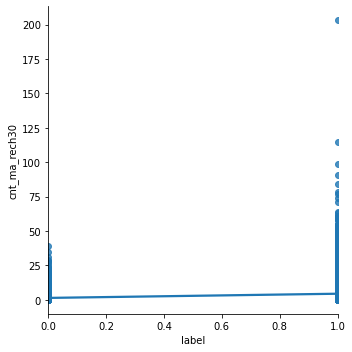

In [35]:
sns.lmplot(y='cnt_ma_rech30', x='label', data=df)

There is a very slight +ve slope between cnt_ma_rech30 and label. But the line appears near x axis means cnt_ma_rech30 is very much concentrated near 0.

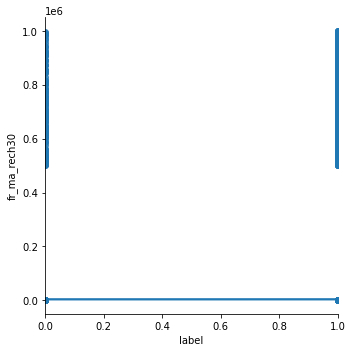

In [36]:
sns.lmplot(y='fr_ma_rech30', x='label', data=df)

There is a no relation between fr_ma_rech30 and label. We can drop it.

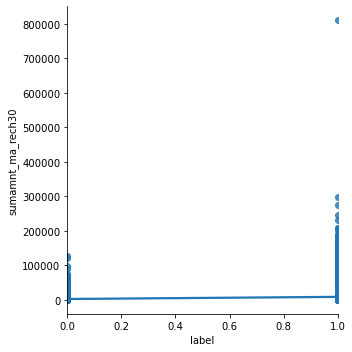

In [37]:
sns.lmplot(y='sumamnt_ma_rech30', x='label', data=df)

There is very silght +ve relation between sumamnt_ma_rech90 and label.

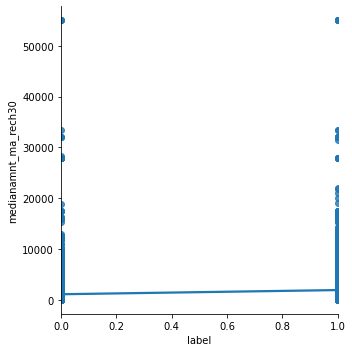

In [38]:
sns.lmplot(y='medianamnt_ma_rech30', x='label', data=df)

There is a very slight +ve relation between medianamnt_ma_rech90 and label. But the line appears near x axis means medianamnt_ma_rech90 is very much concentrated near 0.

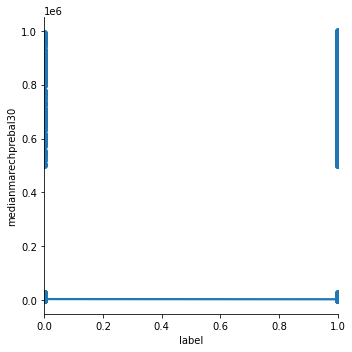

In [39]:
sns.lmplot(y='medianmarechprebal30', x='label', data=df)

There is a no relation between medianmarechprebal90 and label. We can drop it.

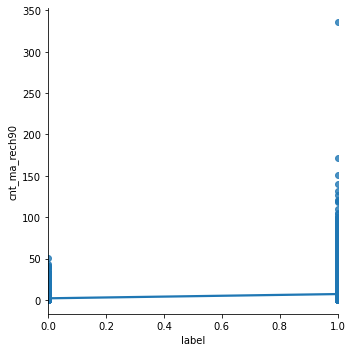

In [40]:
sns.lmplot(y='cnt_ma_rech90', x='label', data=df)

There is a very slight +ve relation between cnt_da_rech90 and label. But the line appears near x axis means cnt_da_rech90 is very much concentrated near 0.

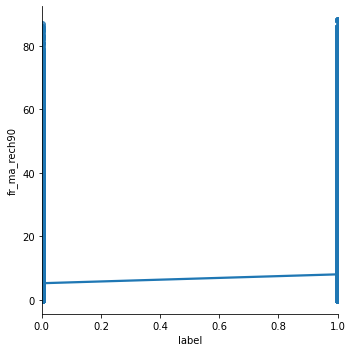

In [59]:
sns.lmplot(y='fr_ma_rech90', x='label', data=df)

There is a +ve relation between fr_da_rech90 and label. But the line appears near x axis means fr_da_rech90 is very much concentrated near 0.

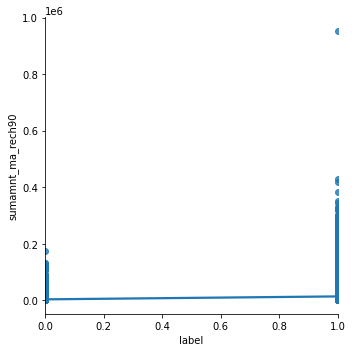

In [42]:
sns.lmplot(y='sumamnt_ma_rech90', x='label', data=df)

There is a very slight +ve to no relation between sumamnt_ma_rech90 and label. But the line appears near x axis means sumamnt_ma_rech90 is very much concentrated near 0.

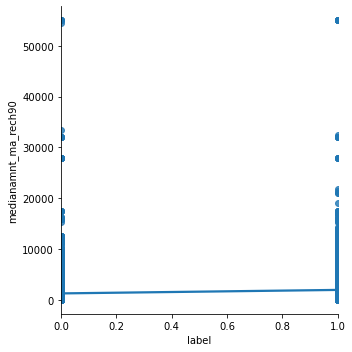

In [43]:
sns.lmplot(y='medianamnt_ma_rech90', x='label', data=df)

There is a very slight +ve to no relation between medianamnt_ma_rech90 and label. But the line appears near x axis means medianamnt_ma_rech90 is very much concentrated near 0.

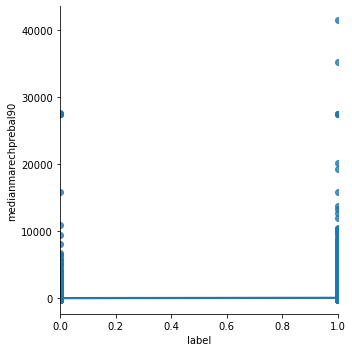

In [44]:
sns.lmplot(y='medianmarechprebal90', x='label', data=df)

There is no relation between medianmarechprebal90 and label. We can drop it.

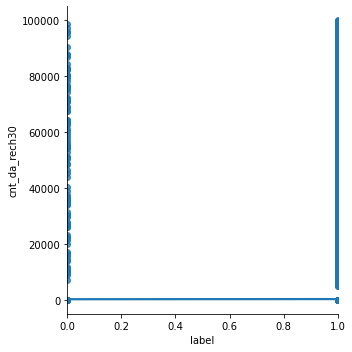

In [45]:
sns.lmplot(y='cnt_da_rech30', x='label', data=df)

There is no relation between cnt_da_rech30 and label. We can drop it.

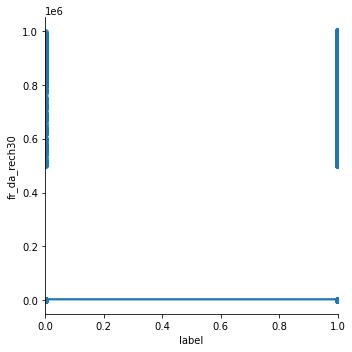

In [46]:
sns.lmplot(y='fr_da_rech30', x='label', data=df)

There is no relation between fr_da_rech30 and label seems 0. We can drop it.

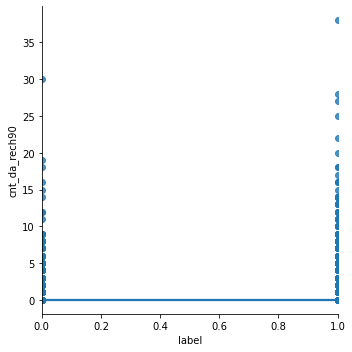

In [47]:
sns.lmplot(y='cnt_da_rech90', x='label', data=df)

There is no relation between cnt_da_rech90 and label seems 0. We can drop it.

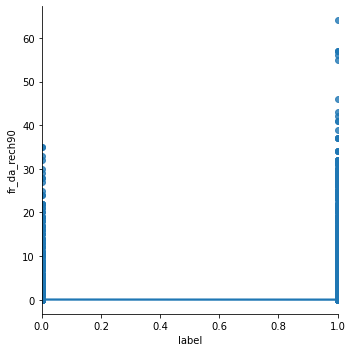

In [48]:
sns.lmplot(y='fr_da_rech90', x='label', data=df)

There is no relation between fr_da_rech90 and label seems 0. We can drop it.

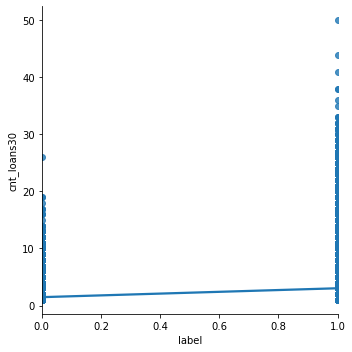

In [49]:
sns.lmplot(y='cnt_loans30', x='label', data=df)

There is a some +ve relation between cnt_loans30 and label. But the line appears near x axis means cnt_loans30 is very much concentrated near 0.

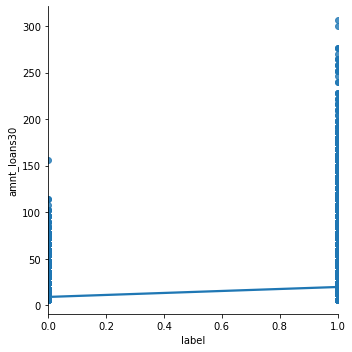

In [50]:
sns.lmplot(y='amnt_loans30', x='label', data=df)

There is a some +ve relation between amnt_loans30 and label. But the line appears near x axis means amnt_loans30 is very much concentrated near 0.

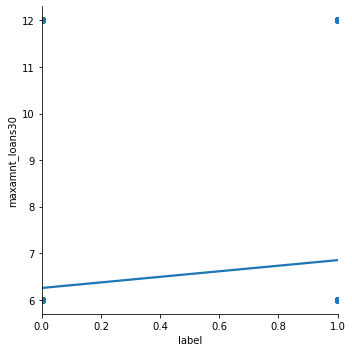

In [51]:
sns.lmplot(y='maxamnt_loans30', x='label', data=df)

There is a good +ve relation between maxamnt_loans30 and label. But the line appears near x axis means maxamnt_loans30 is very much concentrated near 0.

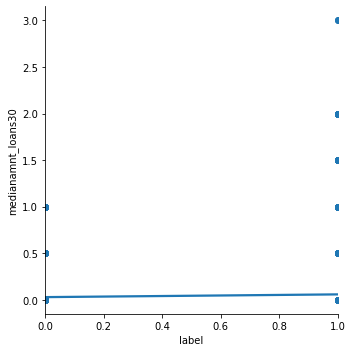

In [52]:
sns.lmplot(y='medianamnt_loans30', x='label', data=df)

There is a none to a very slight +ve relation between medianamnt_loans30 and label. But the line appears near x axis means medianamnt_loans30 is very much concentrated near 0.

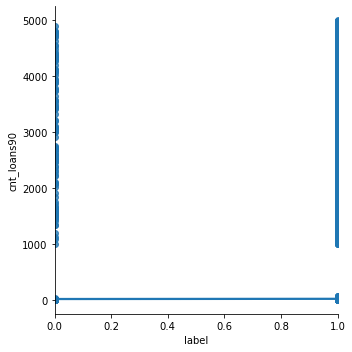

In [53]:
sns.lmplot(y='cnt_loans90', x='label', data=df)

There is no relation between cnt_loans90 and label. We can drop it.

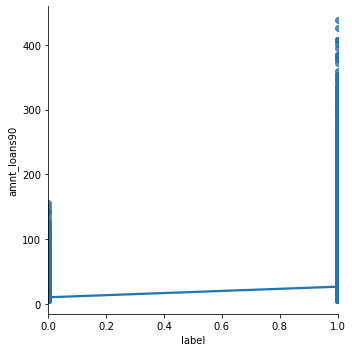

In [54]:
sns.lmplot(y='amnt_loans90', x='label', data=df)

There is a some +ve relation between amnt_loans90 and label. But the line appears near x axis means amnt_loans90 is very much concentrated near 0.

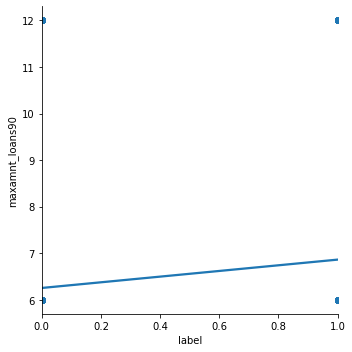

In [55]:
sns.lmplot(y='maxamnt_loans90', x='label', data=df)

There is a good +ve relation between maxamnt_loans90 and label. But the line appears near x axis means maxamnt_loans90 is very much concentrated near 0.

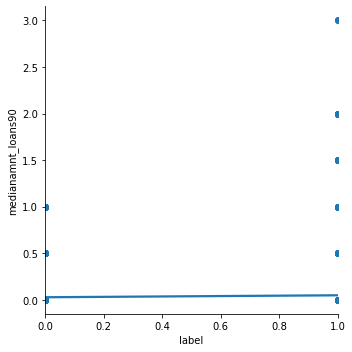

In [56]:
sns.lmplot(y='medianamnt_loans90', x='label', data=df)

The slope between medianamnt_loans90 and label seems 0. We shall drop the column.

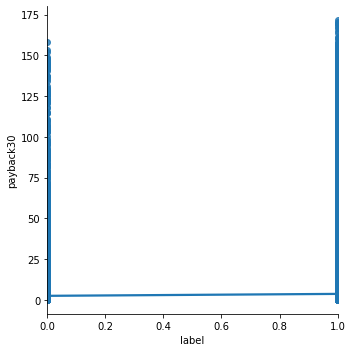

In [57]:
sns.lmplot(y='payback30', x='label', data=df)

There is a very slight +ve relation between payback30 and label.

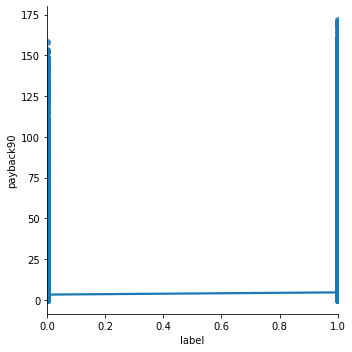

In [58]:
sns.lmplot(y='payback90', x='label', data=df)

There is a almost 0 relation between payback90 and label. As expected from plot of payback30

There are many columns which have a high relation with the target variable.

Also there are many columns which have a slight to no relation with the target variable.

Also there are many columns which have strictly no relation with the target variable.

In [59]:
#Correlation matrix

corr = df.corr()
corr.sort_values(by='label', ascending=False)

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003308,0.162057,0.160107,0.050828,0.067792,0.002898,0.001167,0.119448,0.230169,...,0.197280,0.197922,0.095991,0.043346,0.005164,0.198507,0.097268,0.033940,0.043573,0.042525
cnt_ma_rech30,0.230169,-0.002801,0.449140,0.424795,0.235445,0.233355,0.003361,0.001467,-0.006714,1.000000,...,0.768701,0.754420,0.167105,-0.070427,0.015205,0.684918,0.168265,-0.074212,0.037424,0.011691
cnt_ma_rech90,0.229093,-0.002732,0.587051,0.593091,0.315798,0.350332,0.003267,0.001377,0.012155,0.885977,...,0.694783,0.713271,0.245986,-0.055552,0.016309,0.788008,0.250904,-0.074768,0.006944,-0.008463
sumamnt_ma_rech90,0.198841,0.000877,0.761763,0.767563,0.344815,0.363426,0.001477,-0.000129,0.415829,0.582896,...,0.447587,0.514788,0.338860,-0.022572,0.011623,0.567285,0.342237,-0.043626,-0.030447,-0.034453
amnt_loans90,0.198507,-0.002486,0.571599,0.576356,0.307754,0.339232,0.000763,0.000046,0.012801,0.684918,...,0.850988,0.896967,0.304126,-0.072089,0.017782,1.000000,0.308484,-0.099102,0.045254,0.023524
amnt_loans30,0.197922,-0.001634,0.480756,0.457866,0.243102,0.244292,0.000731,-0.000151,0.008491,0.754420,...,0.956524,1.000000,0.311973,-0.084886,0.014748,0.896967,0.310406,-0.092380,0.052559,0.025788
cnt_loans30,0.197280,-0.001714,0.373159,0.348095,0.188396,0.182229,0.001063,-0.000337,-0.028777,0.768701,...,1.000000,0.956524,0.110046,-0.100115,0.015734,0.850988,0.110019,-0.102690,0.060036,0.028343
sumamnt_ma_rech30,0.196043,0.000797,0.633942,0.601337,0.274075,0.261584,0.001343,0.000133,0.440494,0.654093,...,0.491942,0.531891,0.264130,-0.036403,0.009669,0.483645,0.264399,-0.043964,-0.005185,-0.017657
daily_decr30,0.162057,0.000913,1.000000,0.977551,0.446211,0.464283,-0.000527,-0.001514,0.271230,0.449140,...,0.373159,0.480756,0.430890,-0.011114,0.009163,0.571599,0.433997,-0.037864,0.024824,0.044651
daily_decr90,0.160107,0.000236,0.977551,1.000000,0.438720,0.477178,-0.000004,-0.001736,0.258867,0.424795,...,0.348095,0.457866,0.426717,-0.004777,0.009551,0.576356,0.432240,-0.035160,0.017736,0.038421


"cnt_ma_rech30","cnt_ma_rech90","sumamnt_ma_rech90","amnt_loans90","amnt_loans30","cnt_loans30","sumamnt_ma_rech30","daily_decr30","daily_decr90","medianamnt_ma_rech30","last_rech_amt_ma","medianamnt_ma_rech90","maxamnt_loans90","maxamnt_loans30","fr_ma_rech90","rental90","rental30","payback30","medianamnt_loans30","payback90","medianmarechprebal90","medianamnt_loans90","cnt_loans90","cnt_da_rech30","last_rech_date_ma","last_rech_date_da","cnt_da_rech90","fr_ma_rech30" are the columns which have positive relation with target variable(label).

"fr_da_rech30","aon","medianmarechprebal30","fr_da_rech90" are the columns which have negative relation with target variable(label).

"cnt_da_rech30","last_rech_date_ma","last_rech_date_da","cnt_da_rech90","fr_ma_rech30","fr_da_rech30","aon","medianmarechprebal30" these cols can easily be remove as they have tends to 0 relation with the label.

In [60]:
df.drop(["cnt_da_rech30","last_rech_date_ma","last_rech_date_da","cnt_da_rech90","fr_ma_rech30","fr_da_rech30","aon","medianmarechprebal30"],1,inplace=True)
corr = df.corr()

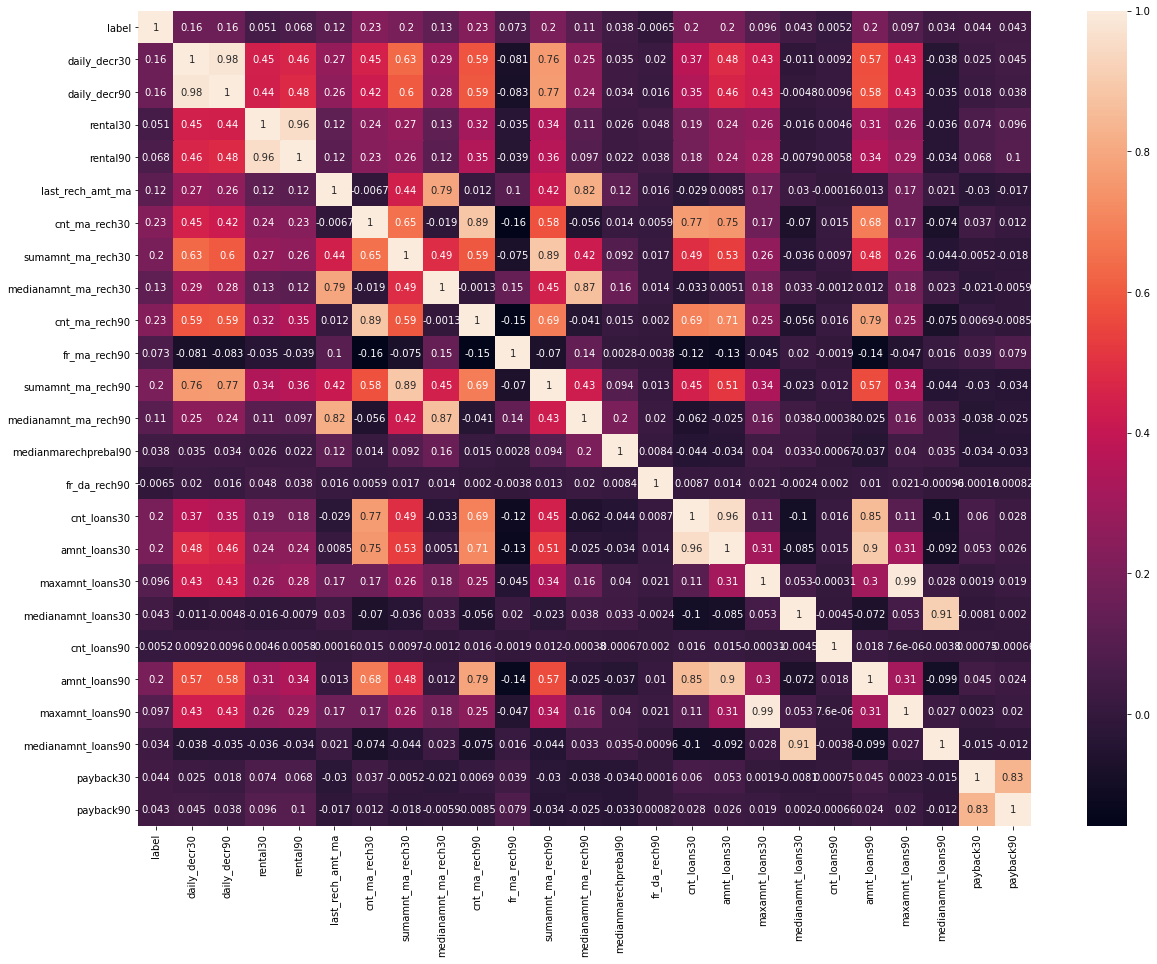

In [61]:
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot=True)
plt.show()

daily_decr30 and daily_decr90 are 98% related to each other, we can remove either of them.

rental30 and rental90 are 96% related to each other, we can remove either of them.

cnt_loans30 and amnt_loans30 are 96% related to each other, we can remove either of them.

So out of the above 3 pairs let's see which have more relation with the label then we can drop the other one.

In [62]:
df[["label", "daily_decr30", "daily_decr90","rental30", "rental90", "cnt_loans30", "amnt_loans30"]].corr().sort_values(by='label', ascending=False)

,label,daily_decr30,daily_decr90,rental30,rental90,cnt_loans30,amnt_loans30
label,1.000000,0.162057,0.160107,0.050828,0.067792,0.197280,0.197922
amnt_loans30,0.197922,0.480756,0.457866,0.243102,0.244292,0.956524,1.000000
cnt_loans30,0.197280,0.373159,0.348095,0.188396,0.182229,1.000000,0.956524
daily_decr30,0.162057,1.000000,0.977551,0.446211,0.464283,0.373159,0.480756
daily_decr90,0.160107,0.977551,1.000000,0.438720,0.477178,0.348095,0.457866
rental90,0.067792,0.464283,0.477178,0.955910,1.000000,0.182229,0.244292
rental30,0.050828,0.446211,0.438720,1.000000,0.955910,0.188396,0.243102


In [63]:
#Dropping cnt_loans30, daily_decr90 and rental30 column.

df.drop(["cnt_loans30", "daily_decr90", "rental30"],1,inplace=True)

In [64]:
df.columns

Index(['label', 'daily_decr30', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'fr_da_rech90',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle'],
      dtype='object')

In [65]:
df.corr().sort_values(by="payback30", ascending=False).drop(["label","daily_decr30","rental90","last_rech_amt_ma","cnt_ma_rech30","sumamnt_ma_rech30","medianamnt_ma_rech30","fr_ma_rech90","sumamnt_ma_rech90","medianamnt_ma_rech90","medianmarechprebal90","fr_da_rech90","amnt_loans30","medianamnt_loans30","cnt_loans90","amnt_loans90","maxamnt_loans90","medianamnt_loans90"],1)

,cnt_ma_rech90,maxamnt_loans30,payback30,payback90
payback30,0.006944,0.001911,1.000000,0.834834
payback90,-0.008463,0.019441,0.834834,1.000000
rental90,0.350332,0.283160,0.068281,0.100217
amnt_loans30,0.713271,0.311973,0.052559,0.025788
amnt_loans90,0.788008,0.304126,0.045254,0.023524
label,0.229093,0.095991,0.043573,0.042525
fr_ma_rech90,-0.154685,-0.045451,0.039127,0.078741
cnt_ma_rech30,0.885977,0.167105,0.037424,0.011691
daily_decr30,0.587051,0.430890,0.024824,0.044651
cnt_ma_rech90,1.000000,0.245986,0.006944,-0.008463


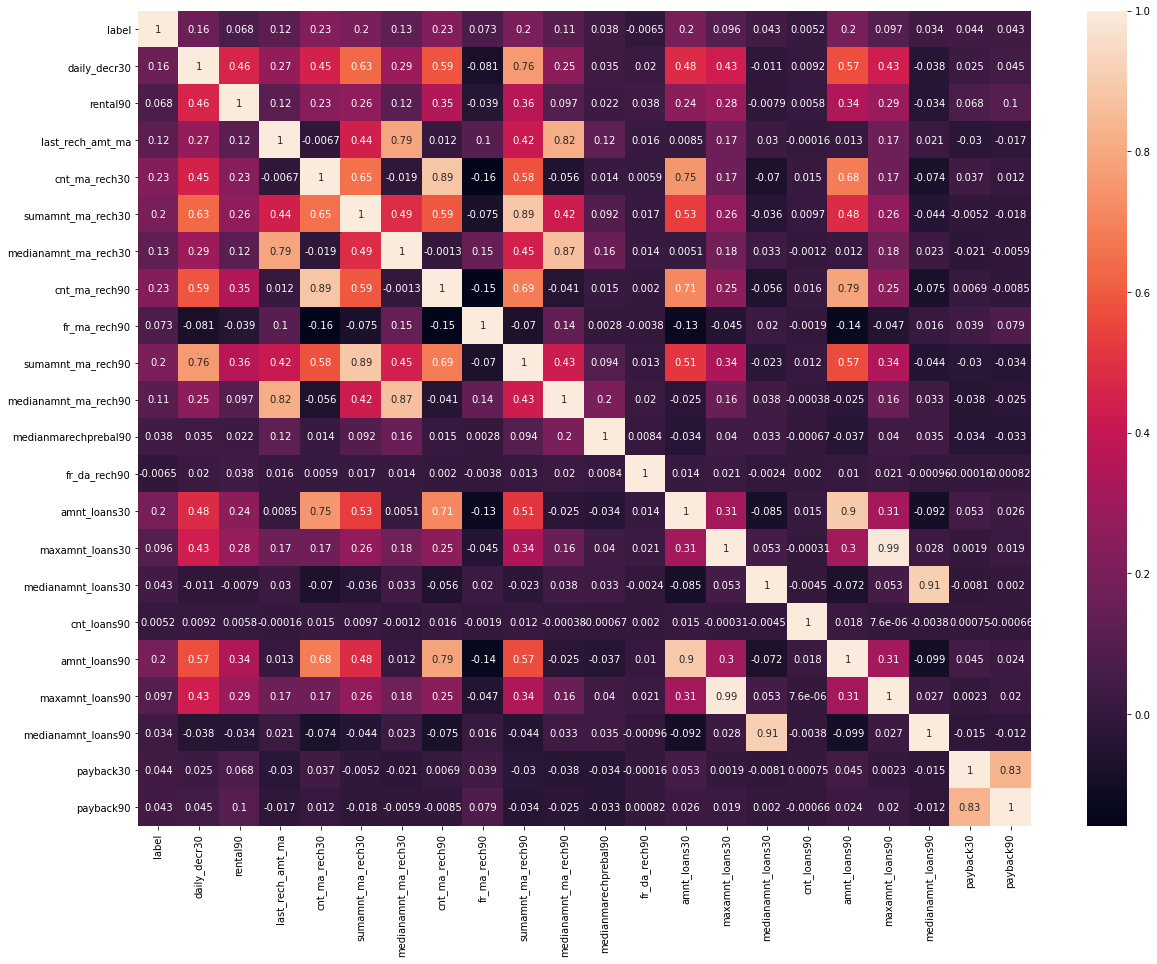

In [66]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

sumamnt_ma_rech30 and sumamnt_ma_rech90 have 89% positive correlation, so we can remove the column which has lesser relation to the label column.

medianamnt_ma_rech30 and medianamnt_ma_rech90 have 87% positive correlation, so we can remove the column which has lesser relation to the label column.

amnt_loans30 and amnt_loans90 have 90% positive correlation, so we can remove the column which has lesser relation to the label column.

medianamnt_loans30 and medianamnt_loans90 have 91% positive correlation, so we can remove the column which has lesser relation to the label column.

Let's handle these points first before moving forward.

In [67]:
df[["label", "sumamnt_ma_rech30", "sumamnt_ma_rech90", "medianamnt_ma_rech30", "medianamnt_ma_rech90", "amnt_loans30", "amnt_loans90", "medianamnt_loans30", "medianamnt_loans90"]].corr().sort_values(by='label', ascending=False)

,label,sumamnt_ma_rech30,sumamnt_ma_rech90,medianamnt_ma_rech30,medianamnt_ma_rech90,amnt_loans30,amnt_loans90,medianamnt_loans30,medianamnt_loans90
label,1.000000,0.196043,0.198841,0.129419,0.107900,0.197922,0.198507,0.043346,0.033940
sumamnt_ma_rech90,0.198841,0.890697,1.000000,0.446127,0.426458,0.514788,0.567285,-0.022572,-0.043626
amnt_loans90,0.198507,0.483645,0.567285,0.011658,-0.024866,0.896967,1.000000,-0.072089,-0.099102
amnt_loans30,0.197922,0.531891,0.514788,0.005093,-0.025496,1.000000,0.896967,-0.084886,-0.092380
sumamnt_ma_rech30,0.196043,1.000000,0.890697,0.487224,0.422522,0.531891,0.483645,-0.036403,-0.043964
medianamnt_ma_rech30,0.129419,0.487224,0.446127,1.000000,0.867880,0.005093,0.011658,0.033329,0.022598
medianamnt_ma_rech90,0.107900,0.422522,0.426458,0.867880,1.000000,-0.025496,-0.024866,0.038412,0.032784
medianamnt_loans30,0.043346,-0.036403,-0.022572,0.033329,0.038412,-0.084886,-0.072089,1.000000,0.912601
medianamnt_loans90,0.033940,-0.043964,-0.043626,0.022598,0.032784,-0.092380,-0.099102,0.912601,1.000000


In [68]:
#Dropping cnt_ma_rech90, medianamnt_ma_rech90, maxamnt_loans30 and last_rech_date_da column.

df.drop(["amnt_loans30", "sumamnt_ma_rech30", "medianamnt_ma_rech90", "medianamnt_loans90"],1,inplace=True)

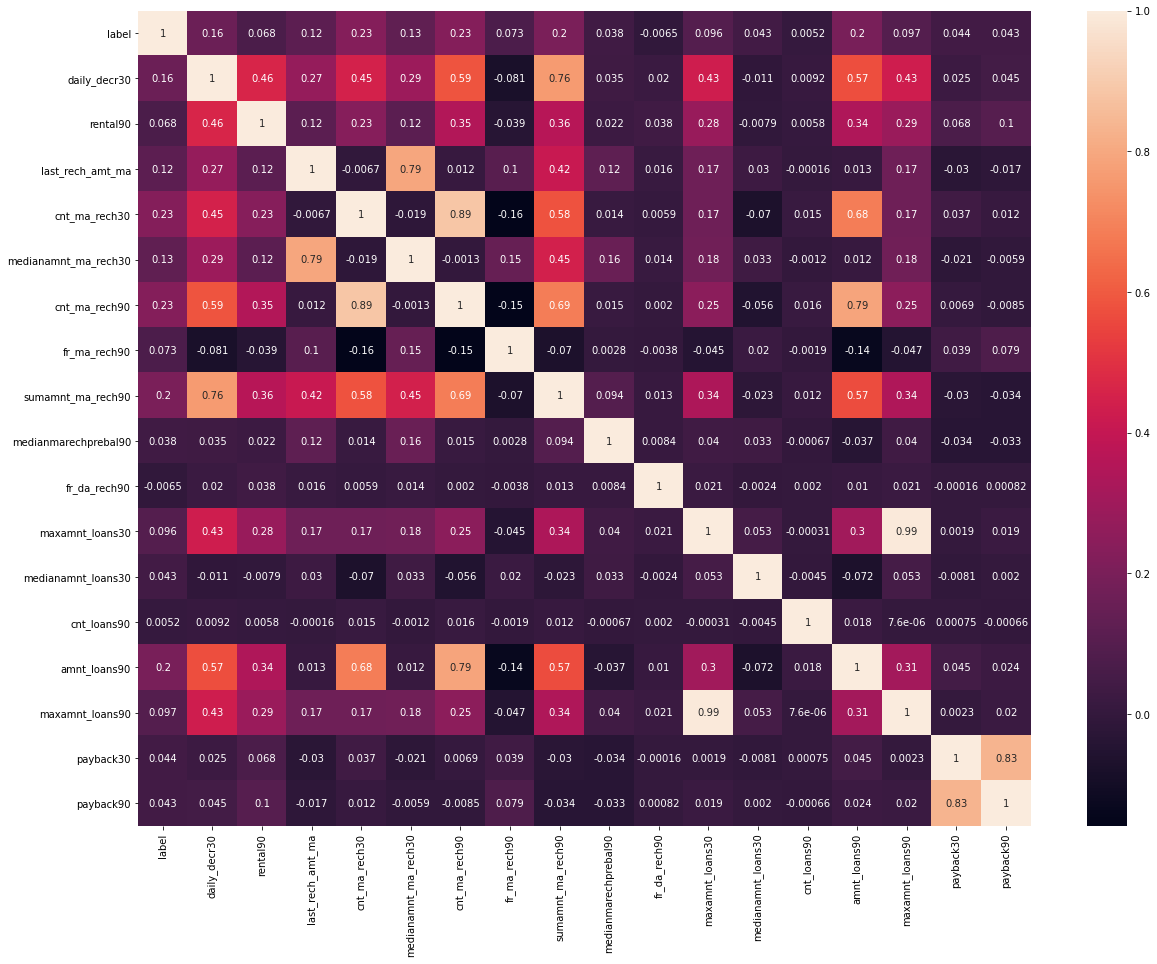

In [69]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [70]:
df.columns

Index(['label', 'daily_decr30', 'rental90', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'medianamnt_ma_rech30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianmarechprebal90',
       'fr_da_rech90', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'payback30', 'payback90', 'pcircle'],
      dtype='object')

In [71]:
df['label'].value_counts()

1    176663
0     23989
Name: label, dtype: int64

# EDA complete

# Data wrangling

In [72]:
df.sample(5)

,label,daily_decr30,rental90,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90,pcircle
27921,1,74.366667,630.89,773,8,773.0,8,1,6958,58.00,0,6.0,0.0,4.0,24,6,2.75,2.75,UPW
162523,1,14.063000,425.28,773,4,473.0,6,0,2238,51.61,0,6.0,0.0,2.0,12,6,0.00,0.00,UPW
180168,1,1021.150000,87.60,770,1,770.0,2,34,1543,62.00,0,6.0,0.0,2.0,12,6,0.00,0.00,UPW
151265,1,58.842667,198.00,2309,4,1928.0,6,12,10024,158.50,0,6.0,0.0,1.0,6,6,0.00,0.00,UPW
155386,0,0.041667,0.00,0,0,0.0,0,0,0,0.00,0,6.0,1.0,1.0,6,6,0.00,0.00,UPW


In [73]:
df['pcircle'].value_counts()

UPW    200652
Name: pcircle, dtype: int64

In [74]:
df.drop('pcircle',1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200652 entries, 0 to 209592
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 200652 non-null  int64  
 1   daily_decr30          200652 non-null  float64
 2   rental90              200652 non-null  float64
 3   last_rech_amt_ma      200652 non-null  int64  
 4   cnt_ma_rech30         200652 non-null  int64  
 5   medianamnt_ma_rech30  200652 non-null  float64
 6   cnt_ma_rech90         200652 non-null  int64  
 7   fr_ma_rech90          200652 non-null  int64  
 8   sumamnt_ma_rech90     200652 non-null  int64  
 9   medianmarechprebal90  200652 non-null  float64
 10  fr_da_rech90          200652 non-null  int64  
 11  maxamnt_loans30       200652 non-null  float64
 12  medianamnt_loans30    200652 non-null  float64
 13  cnt_loans90           200652 non-null  float64
 14  amnt_loans90          200652 non-null  int64  
 15  

we don't have any object type column.

In [76]:
df.describe()

,label,daily_decr30,rental90,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000
mean,0.880445,5458.783346,3489.125971,2072.057732,4.070201,1822.891060,6.441765,7.689746,12600.516098,91.305863,0.047525,6.780695,0.054889,18.630982,24.353777,6.790533,3.499603,4.410203
std,0.324442,9284.488238,5732.633211,2361.242964,4.290086,2059.994463,7.250272,12.478017,16971.640422,352.899996,0.970653,2.018590,0.219617,224.752294,26.734081,2.029353,8.870415,10.322060
min,0.000000,0.000000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
25%,1.000000,46.120000,313.867500,770.000000,1.000000,770.000000,2.000000,0.000000,2486.000000,15.000000,0.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,1527.205667,1352.240000,1539.000000,3.000000,1539.000000,4.000000,2.000000,7560.000000,36.500000,0.000000,6.000000,0.000000,2.000000,12.000000,6.000000,1.000000,1.857143
75%,1.000000,7362.058333,4224.505000,2309.000000,6.000000,1924.000000,9.000000,8.000000,16185.250000,79.600000,0.000000,6.000000,0.000000,5.000000,30.000000,6.000000,4.000000,4.625000
max,1.000000,265926.000000,200148.110000,55000.000000,203.000000,55000.000000,336.000000,88.000000,953036.000000,41456.500000,64.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,171.500000,171.500000


In [77]:
arr = []
for i in df.columns:
    if df[i].dtype != 'object':
        arr.append(i)
len(arr)

18

In [78]:
d_df = df.copy()
d_df.skew()

label                   -2.345252
daily_decr30             3.933451
rental90                 4.348784
last_rech_amt_ma         3.797404
cnt_ma_rech30            3.269079
medianamnt_ma_rech30     3.477641
cnt_ma_rech90            3.413126
fr_ma_rech90             2.283725
sumamnt_ma_rech90        4.910781
medianmarechprebal90    45.536678
fr_da_rech90            28.450648
maxamnt_loans30          2.198889
medianamnt_loans30       4.525015
cnt_loans90             16.590519
amnt_loans90             3.120279
maxamnt_loans90          2.177530
payback30                8.213862
payback90                6.847377
dtype: float64

In [79]:
#Transformed the columns with log transformation for which skewness is less than or more than 5.

for i in arr:
    if d_df[i].skew() > 5 or d_df[i].skew() < -5:
        d_df[i] = np.log(1+d_df[i]) #Since there are many rows with value as 0
d_df.skew()

label                   -2.345252
daily_decr30             3.933451
rental90                 4.348784
last_rech_amt_ma         3.797404
cnt_ma_rech30            3.269079
medianamnt_ma_rech30     3.477641
cnt_ma_rech90            3.413126
fr_ma_rech90             2.283725
sumamnt_ma_rech90        4.910781
medianmarechprebal90    -0.574748
fr_da_rech90            17.737819
maxamnt_loans30          2.198889
medianamnt_loans30       4.525015
cnt_loans90              3.262708
amnt_loans90             3.120279
maxamnt_loans90          2.177530
payback30                0.854399
payback90                0.722347
dtype: float64

Even after log transformation, there is no drastic change in skewness, let's leave it.

In [80]:
# Remove d_df dataframe
del d_df

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200652 entries, 0 to 209592
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 200652 non-null  int64  
 1   daily_decr30          200652 non-null  float64
 2   rental90              200652 non-null  float64
 3   last_rech_amt_ma      200652 non-null  int64  
 4   cnt_ma_rech30         200652 non-null  int64  
 5   medianamnt_ma_rech30  200652 non-null  float64
 6   cnt_ma_rech90         200652 non-null  int64  
 7   fr_ma_rech90          200652 non-null  int64  
 8   sumamnt_ma_rech90     200652 non-null  int64  
 9   medianmarechprebal90  200652 non-null  float64
 10  fr_da_rech90          200652 non-null  int64  
 11  maxamnt_loans30       200652 non-null  float64
 12  medianamnt_loans30    200652 non-null  float64
 13  cnt_loans90           200652 non-null  float64
 14  amnt_loans90          200652 non-null  int64  
 15  

In [82]:
df.describe()

,label,daily_decr30,rental90,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000
mean,0.880445,5458.783346,3489.125971,2072.057732,4.070201,1822.891060,6.441765,7.689746,12600.516098,91.305863,0.047525,6.780695,0.054889,18.630982,24.353777,6.790533,3.499603,4.410203
std,0.324442,9284.488238,5732.633211,2361.242964,4.290086,2059.994463,7.250272,12.478017,16971.640422,352.899996,0.970653,2.018590,0.219617,224.752294,26.734081,2.029353,8.870415,10.322060
min,0.000000,0.000000,-24720.580000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-200.000000,0.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
25%,1.000000,46.120000,313.867500,770.000000,1.000000,770.000000,2.000000,0.000000,2486.000000,15.000000,0.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000
50%,1.000000,1527.205667,1352.240000,1539.000000,3.000000,1539.000000,4.000000,2.000000,7560.000000,36.500000,0.000000,6.000000,0.000000,2.000000,12.000000,6.000000,1.000000,1.857143
75%,1.000000,7362.058333,4224.505000,2309.000000,6.000000,1924.000000,9.000000,8.000000,16185.250000,79.600000,0.000000,6.000000,0.000000,5.000000,30.000000,6.000000,4.000000,4.625000
max,1.000000,265926.000000,200148.110000,55000.000000,203.000000,55000.000000,336.000000,88.000000,953036.000000,41456.500000,64.000000,12.000000,3.000000,4997.517944,438.000000,12.000000,171.500000,171.500000


In [83]:
#We will Encode it using Label Encoder since already there are some columns ith -ve values that too with huge numbers.
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()

In [84]:
for i in df.columns:
    if df[i].max() > 9:
        df[i] = mms.fit_transform(df[[i]])
df.describe()

,label,daily_decr30,rental90,last_rech_amt_ma,cnt_ma_rech30,medianamnt_ma_rech30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianmarechprebal90,fr_da_rech90,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,payback30,payback90
count,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000,200652.000000
mean,0.880445,0.020527,0.125450,0.037674,0.020050,0.033143,0.019172,0.087383,0.013221,0.006993,0.000743,0.130116,0.054889,0.003529,0.042486,0.131755,0.020406,0.025715
std,0.324442,0.034914,0.025493,0.042932,0.021133,0.037454,0.021578,0.141796,0.017808,0.008472,0.015166,0.336432,0.219617,0.044982,0.061884,0.338226,0.051723,0.060187
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000173,0.111329,0.014000,0.004926,0.014000,0.005952,0.000000,0.002609,0.005161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.005743,0.115947,0.027982,0.014778,0.027982,0.011905,0.022727,0.007933,0.005677,0.000000,0.000000,0.000000,0.000200,0.013889,0.000000,0.005831,0.010829
75%,1.000000,0.027685,0.128720,0.041982,0.029557,0.034982,0.026786,0.090909,0.016983,0.006712,0.000000,0.000000,0.000000,0.000801,0.055556,0.000000,0.023324,0.026968
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [85]:
#Models Import
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
#Metrics Import
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, accuracy_score, make_scorer

In [86]:
from tune_sklearn import TuneGridSearchCV

In [87]:
lm = LogisticRegression()
dtc = DecisionTreeClassifier()
knc = KNeighborsClassifier()
gnc = GaussianNB()
svc = SVC()
rfc = RandomForestClassifier()
models = [lm, dtc, knc, gnc, svc, rfc]
modelname = ['Logistic Regression', 'DecisionTree Classification',
             'KNeighbors Classification', 'Gaussian NB',
             'SVC', 'RandomForestClassifier']

In [88]:
lmparams = {'penalty': ['l2', 'none', 'l1', 'elasticnet'], 'max_iter': [1000], 'random_state' : range(50,171)}
dtcparams = {'criterion' : ['gini', 'entropy'], 'splitter' : ['best', 'random'], 'min_samples_split' : range(10), 'random_state' : range(50,171)}
kncparams = {'n_neighbors' : range(3,11), 'weights' : ['uniform', 'distance']}
gncparams = {'var_smoothing': np.logspace(0,-9, num=100)}
svcparams = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'], 'C' : range(50,80), 'random_state' : range(50,171)}
rfcparams = {'criterion' : ['gini', 'entropy'], 'n_estimators' : range(50,80), 'random_state' : range(50,171)}

In [89]:
#Split test train sets

X = df.drop("label",1)
y = df["label"]

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7, stratify=y)

In [91]:
model_score_table = pd.DataFrame(columns=['Model Name', 'Accuracy Score'])

In [92]:
#lmgs = RandomizedSearchCV(lm, lmparams,return_train_score = False, cv = 5, n_iter=250)
#lmgs.fit(X, y)
#lmDF = pd.DataFrame(lmgs.cv_results_)
#lmDF['mean_test_score'] = np.abs(lmDF['mean_test_score'])
#lmDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [93]:
#i = lmDF[lmDF['mean_test_score']==lmDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[0] = ["Logistic Regression", lmDF['mean_test_score'][i]]
#model_score_table

In [94]:
#dtcgs = RandomizedSearchCV(dtc, dtcparams,return_train_score = False, cv = 5, n_iter=250)
#dtcgs.fit(X, y)
#dtcDF = pd.DataFrame(dtcgs.cv_results_)
#dtcDF['mean_test_score'] = np.abs(dtcDF['mean_test_score'])
#dtcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [95]:
#i = dtcDF[dtcDF['mean_test_score']==dtcDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[1] = ["Decision Trees Classifier", dtcDF['mean_test_score'][i]]
#model_score_table

In [96]:
#kncgs = RandomizedSearchCV(knc, kncparams,return_train_score = False, cv = 5, n_iter=250)
#kncgs.fit(X, y)
#kncDF = pd.DataFrame(kncgs.cv_results_)
#kncDF['mean_test_score'] = np.abs(kncDF['mean_test_score'])
#kncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [97]:
#i = kncDF[kncDF['mean_test_score']==kncDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[2] = ["KNN Classifier", kncDF['mean_test_score'][i]]
#model_score_table

In [98]:
#gncgs = RandomizedSearchCV(gnc, gncparams,return_train_score = False, cv = 5, n_iter=250)
#gncgs.fit(X, y)
#gncDF = pd.DataFrame(gncgs.cv_results_)
#gncDF['mean_test_score'] = np.abs(gncDF['mean_test_score'])
#gncDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [99]:
#i = gncDF[gncDF['mean_test_score']==gncDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[3] = ["Gaussian NB Classifier", gncDF['mean_test_score'][i]]
#model_score_table

In [100]:
#svcgs = RandomizedSearchCV(svc, svcparams,return_train_score = False, cv = 5, n_iter=250)
#svcgs.fit(X, y)
#svcDF = pd.DataFrame(svcgs.cv_results_)
#svcDF['mean_test_score'] = np.abs(svcDF['mean_test_score'])
#svcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [101]:
#i = svcDF[svcDF['mean_test_score']==svcDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[4] = ["SVC Classifier", svcDF['mean_test_score'][i]]
#model_score_table

In [102]:
#rfcgs = RandomizedSearchCV(rfc, rfcparams,return_train_score = False, cv = 5, n_iter=250)
#rfcgs.fit(X, y)
#rfcDF = pd.DataFrame(rfcgs.cv_results_)
#rfcDF['mean_test_score'] = np.abs(rfcDF['mean_test_score'])
#rfcDF[['params', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

In [103]:
#i = rfcDF[rfcDF['mean_test_score']==rfcDF['mean_test_score'].max()].index.values[0]
#model_score_table.loc[5] = ["Random Forest Classifier", rfcDF['mean_test_score'][i]]
#model_score_table

In [104]:
#model_score_table.sort_values(by="Accuracy Score", ascending=False)

Best performog model is KNN classifier, my computer was running from last 4 days but still SVC was not complete, and after SVC, RFC was pending, which is again a very time taking model, so I am pausing after GNC model. I will put the snapshots of the KNN model score and all models best score in the ZIP file.

KNN model best score is 0.899448, with the parameters [weights = 'uniform' and n_neighbors = '9'], so we will choose this model.

In [105]:
model = knc = KNeighborsClassifier(weights = 'uniform', n_neighbors = 9)

In [106]:
#X_train, X_test, y_train, y_test

model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [107]:
model.score(X_train, y_train)

0.910671211849371

In [108]:
pred = model.predict(X_test)

In [109]:
print(confusion_matrix(pred, y_test))
print(classification_report(pred, y_test))
print(accuracy_score(pred, y_test))

[[ 2101  1174]
 [ 3896 42992]]
              precision    recall  f1-score   support

           0       0.35      0.64      0.45      3275
           1       0.97      0.92      0.94     46888

    accuracy                           0.90     50163
   macro avg       0.66      0.78      0.70     50163
weighted avg       0.93      0.90      0.91     50163

0.8989294898630464


In [110]:
fpr, tpr, thresholds = roc_curve(y_test, pred)

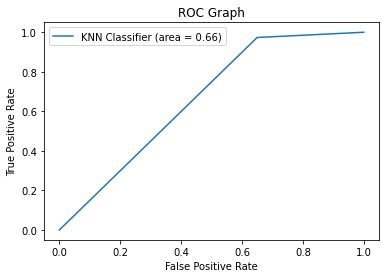

In [111]:
plt.plot(fpr, tpr, label='KNN Classifier (area = {})' .format(round(roc_auc_score(y_test, pred),2)))
plt.legend(loc="top left")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.show()

In [112]:
import joblib

In [113]:
# save the model to disk
filename = 'final_model.pkl'
joblib.dump(model, filename)

['final_model.pkl']

# Below steps are taken to prepare the input data to run in model.

df.drop(["msisdn","pdate"], 1, inplace=True)
df = df[df['aon'] >= 0]
df = df[df['daily_decr30'] >= 0]
df = df[df['daily_decr90'] >= 0]
df = df[df['last_rech_date_ma'] >= 0]
df = df[df['last_rech_date_da'] >= 0]


df = df[(df['maxamnt_loans30'] == 6.00000) | (df['maxamnt_loans30'] == 12.00000)]

df = df[df['medianmarechprebal90'] != -1]

df.drop(["cnt_da_rech30","last_rech_date_ma","last_rech_date_da","cnt_da_rech90","fr_ma_rech30","fr_da_rech30","aon","medianmarechprebal30"],1,inplace=True)

df.drop(["cnt_loans30", "daily_decr90", "rental30"],1,inplace=True)


df.drop(["amnt_loans30", "sumamnt_ma_rech30", "medianamnt_ma_rech90", "medianamnt_loans90"],1,inplace=True)


df.drop('pcircle',1,inplace=True)


for i in df.columns:
    if df[i].max() > 9:
        df[i] = mms.fit_transform(df[[i]])
df.describe()